In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report

In [21]:
X,y=make_classification(n_samples=10000,n_features=4,n_classes=2, weights=[0.9,0.1],random_state=1)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
X_train

array([[-6.16323042e-01,  2.89062585e-01,  2.01748800e-01,
        -1.34216262e-02],
       [-1.40208217e+00,  1.53837234e+00,  3.62736053e-01,
         8.22917920e-01],
       [-1.55272043e+00,  1.78748593e+00,  3.92549342e-01,
         9.92562687e-01],
       ...,
       [ 1.36817995e-01,  1.46968466e-01, -6.78531559e-02,
         2.07565998e-01],
       [-1.51596665e+00, -1.09381082e+00,  6.93416741e-01,
        -1.78183007e+00],
       [-6.81462178e-02,  2.47527481e-01, -1.24344117e-03,
         2.07393546e-01]])

In [25]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
logic=LogisticRegression()
logic.fit(X_train,y_train)
Y_pred=logic.predict(X_test)
Y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
score=accuracy_score(Y_pred,y_test)
print(score)
print(confusion_matrix(Y_pred,y_test))
print(classification_report(Y_pred,y_test))

0.9445
[[1767   95]
 [  16  122]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1862
           1       0.56      0.88      0.69       138

    accuracy                           0.94      2000
   macro avg       0.78      0.92      0.83      2000
weighted avg       0.96      0.94      0.95      2000



# **Hyperparameter Tuning And Cross Validation**

In [28]:
penalty=['l1','l2','elasticnet']
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
C=[1,100,0.1,0,0.01,0.001,10]
params=dict(penalty=penalty,solver=solver,C=C)


In [29]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

**GridSearchCV**

In [34]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=logic,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 100, 0.1, 0, 0.01, 0.001, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [37]:
grid.best_score_

0.951

In [39]:
y_pred_grid=grid.predict(X_test)
score= accuracy_score(y_pred_grid,y_test)
print(score)
print(confusion_matrix(y_pred_grid,y_test))
print(classification_report(y_pred_grid,y_test))

0.9435
[[1765   95]
 [  18  122]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1860
           1       0.56      0.87      0.68       140

    accuracy                           0.94      2000
   macro avg       0.78      0.91      0.83      2000
weighted avg       0.96      0.94      0.95      2000



**RandomizedSearch CV**

In [40]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=logic,param_distributions=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [41]:
random.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 100, 0.1, 0, 0.01, 0.001, 10],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [42]:
random.best_params_

{'solver': 'newton-cholesky', 'penalty': 'l2', 'C': 0.001}

In [43]:
random.best_score_

0.9091249999999998

In [44]:
y_pred_random=random.predict(X_test)
score= accuracy_score(y_pred_random,y_test)
print(score)
print(confusion_matrix(y_pred_random,y_test))
print(classification_report(y_pred_random,y_test))

0.9075
[[1782  184]
 [   1   33]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1966
           1       0.15      0.97      0.26        34

    accuracy                           0.91      2000
   macro avg       0.58      0.94      0.61      2000
weighted avg       0.99      0.91      0.94      2000



# **Logistic Regression For Multiclass Classification Problem**

In [46]:
X,y=make_classification(n_samples=10000,n_classes=4,n_informative=4,n_features=10,random_state=6)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [52]:
logic=LogisticRegression(multi_class='ovr')
logic.fit(X_train,y_train)
y_pred=logic.predict(X_test)
score=accuracy_score(y_pred,y_test)
print(score)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.5805
[[228  76  42  31]
 [162 329  20  50]
 [ 41  73 311 138]
 [ 71  21 114 293]]
              precision    recall  f1-score   support

           0       0.45      0.60      0.52       377
           1       0.66      0.59      0.62       561
           2       0.64      0.55      0.59       563
           3       0.57      0.59      0.58       499

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000



# **Handling Imbalanced Dataset**

In [57]:
from collections import Counter
X,y=make_classification(n_samples=10000,n_classes=2,weights=[0.99,0.1],n_redundant=0,n_clusters_per_class=1,n_features=4,random_state=1)


In [66]:
X

array([[ 0.84633877, -0.03436699, -1.58103538,  1.28469539],
       [ 1.50944316, -0.27071318, -0.70553688,  2.0822565 ],
       [ 0.51523018,  0.60403887, -0.71514572, -0.3419802 ],
       ...,
       [ 0.66170385, -0.55029168, -1.63676836,  0.22874995],
       [ 1.01770292, -0.08427369, -1.96189976,  1.39310389],
       [ 1.28178151, -1.16915672,  2.68437918,  1.85577915]])

In [58]:
Counter(y)

Counter({0: 9842, 1: 158})

<Axes: ylabel='count'>

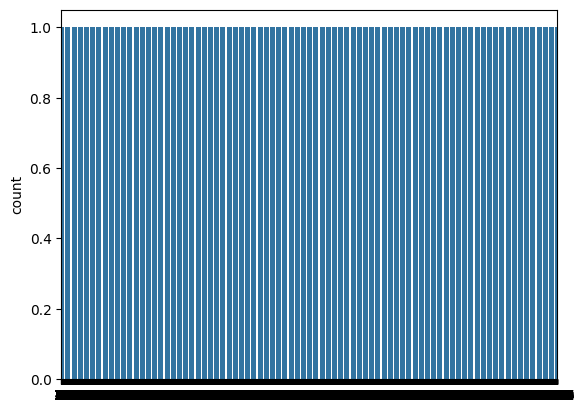

In [59]:
import seaborn as sns
sns.countplot(y)

In [72]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X),y=pd.DataFrame(y),hue=y)

ValueError: If using all scalar values, you must pass an index